# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

In [4]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50000.0,41.524480,1.286603e+01,4.000000,32.000000,40.000000,51.000000,9.800000e+01
full_mob,50000.0,53.642820,4.743042e+01,0.000000,13.000000,37.000000,81.000000,2.360000e+02
ml_balance,50000.0,12881.443477,1.874505e+05,0.000000,0.000000,0.000000,0.000000,1.467568e+07
cl_balance_0m,50000.0,60336.905304,2.017564e+05,0.000000,0.000000,0.000000,0.000000,7.354568e+06
loan_balance_0m,50000.0,81264.982155,2.860175e+05,0.000000,0.000000,0.000000,0.000000,1.467568e+07
td_balance_0m,50000.0,70023.026551,1.679410e+06,0.000000,0.000000,0.000000,0.000000,3.305000e+08
casa_balance_0m,50000.0,68608.162566,1.748867e+06,0.000000,34.000000,760.000000,8762.365000,2.474474e+08
dc_trx_cnt,50000.0,105.011400,1.926877e+02,0.000000,0.000000,14.000000,122.000000,2.970000e+03
dc_trx_sum,50000.0,220740.719638,6.008022e+05,0.000000,0.000000,35001.080000,260323.927500,3.634105e+07
income,50000.0,26008.317214,4.359979e+05,0.000000,0.000000,0.000000,31620.018750,9.060000e+07


### Изучим в каком возврасте люди чаще берут кредиты

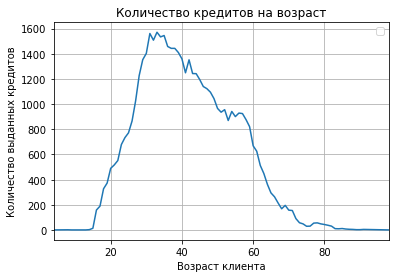

In [49]:
age_credit=df.pivot_table(index='age', values='loan_balance_0m', aggfunc='count')
plt.figure(figsize=(8,4))
age_credit.plot(grid = True)
plt.title("Количество кредитов на возраст")
plt.xlabel("Возраст клиента")
plt.ylabel("Количество выданных кредитов")
plt.legend('')
plt.show()

Данный график говорит нам о том что чаще всего люди берут кредиты в возрасте от 30 до 40 лет. После 75 люди берут кредиты очень редко.

### Посмотрим на показатели по счетам за год мужчин и женщин

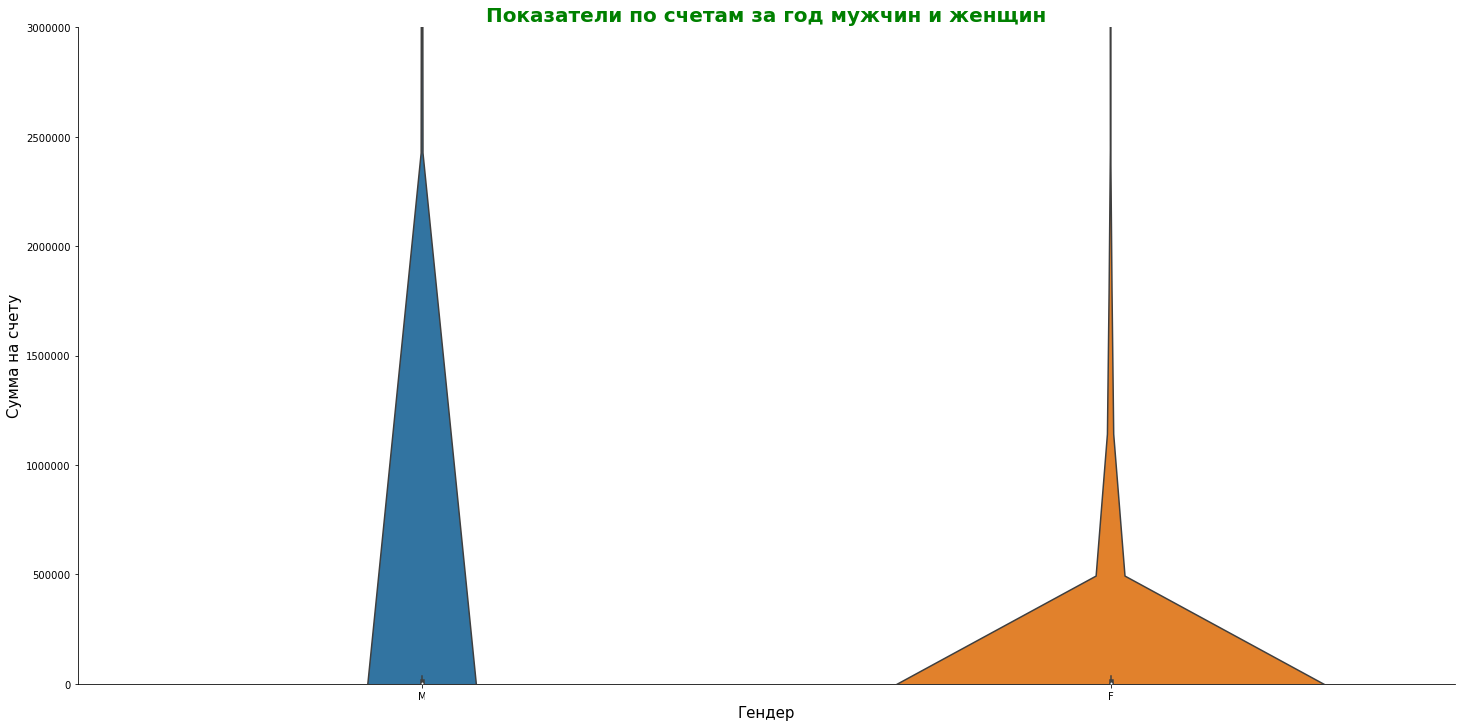

In [50]:
sns.catplot(
    x='gender',
    y='avg_casa_balance_1Y',
    data=df[df['avg_casa_balance_1Y'] != 0],
    kind='violin',
    height=10,
    aspect=2,
    )
plt.title('Показатели по счетам за год мужчин и женщин', size=20, color='g', weight='bold')
plt.ylim(-20, 3000000)
plt.xlabel("Гендер", size = 15)
plt.ylabel("Сумма на счету", size = 15)
plt.show()

У мужчин состояние на счету различается в большом диапозоне, много мужчин как с небольшими суммами на счету, так и с суммами более 100000. У большинства женщин суммы на счету находтся приблизительн в одном диапазоне, и лишь не у многих сумма превышает 50000.  

### Рассмотрим в каких городах выдают кредитов на большую сумму.

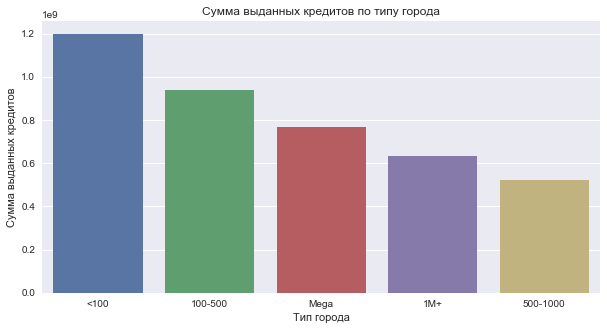

In [18]:
Sum_of_type=df.pivot_table(index='city_type', values='loan_balance_0m', aggfunc='sum').sort_values(by='loan_balance_0m'
                                                                                                          ,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=Sum_of_type.index,y=Sum_of_type['loan_balance_0m'])
plt.title("Сумма выданных кредитов по типу города")
plt.xlabel("Тип города")
plt.ylabel("Сумма выданных кредитов")
plt.show()

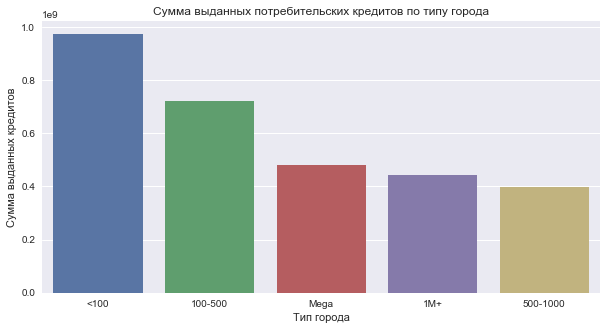

In [23]:
potreb_of_type=df.pivot_table(index='city_type', values='cl_balance_0m', aggfunc='sum').sort_values(by='cl_balance_0m'
                                                                                                          ,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=potreb_of_type.index,y=potreb_of_type['cl_balance_0m'])
plt.title("Сумма выданных потребительских кредитов по типу города")
plt.xlabel("Тип города")
plt.ylabel("Сумма выданных кредитов")
plt.show()

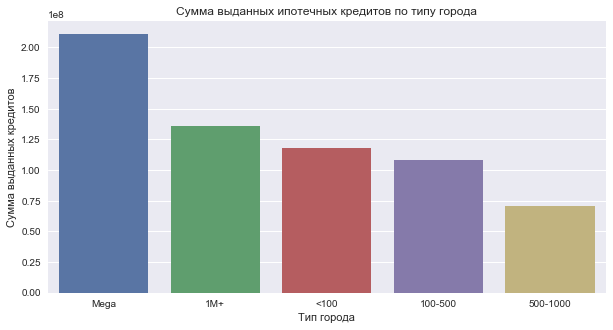

In [24]:
ipoteca_of_type=df.pivot_table(index='city_type', values='ml_balance', aggfunc='sum').sort_values(by='ml_balance'
                                                                                                          ,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=ipoteca_of_type.index,y=ipoteca_of_type['ml_balance'])
plt.title("Сумма выданных ипотечных кредитов по типу города")
plt.xlabel("Тип города")
plt.ylabel("Сумма выданных кредитов")
plt.show()

Большую часть денег берут в кредит в городах менее 100тыс человек и от 100 до 500тыс. Вероятнее всего потому что в небольших городах меньшие зарплаты и людям чаще приходится брать небольшие кредиты, что подтверждает гистограмма с потребительскими кредитами, где в лидерах те же города. По гистограмме выданных ипотек видим, что здесь уже лидируют большие города, что связанно с высокой стоимостью жилой площади в них. 

### Посмотрим на зависимость количества и суммы транзакций, а так же сумамарный доход в зависимости от пола клиента.

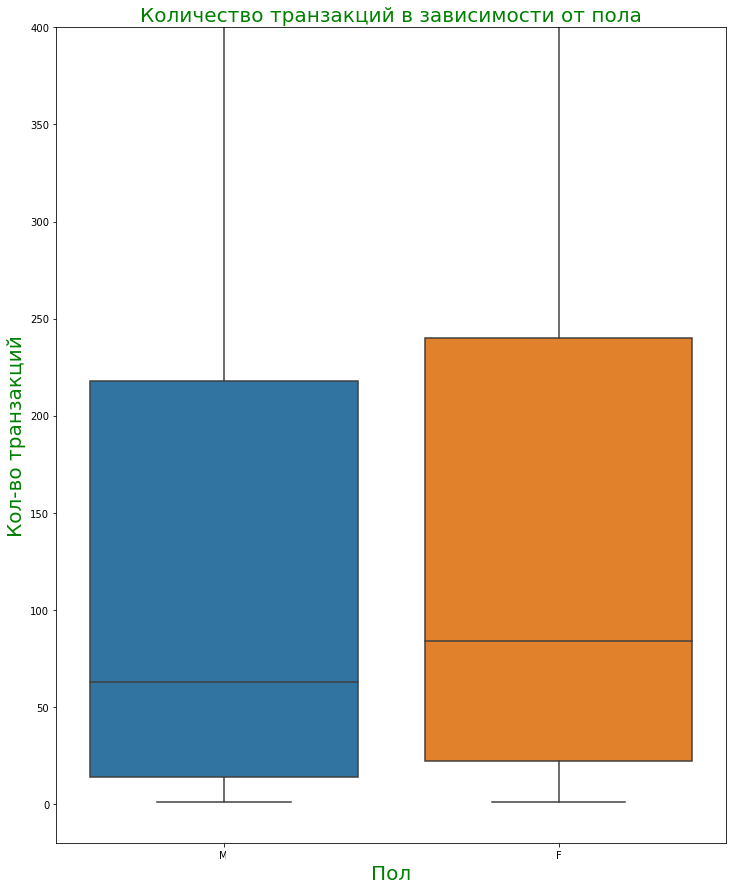

In [40]:
plt.figure(figsize=(12,15))
plt.ylim(-20, 400)
sns.boxplot(data=df[df['dc_trx_cnt'] != 0], x='gender', y='dc_trx_cnt',showfliers=False)
plt.title('Количество транзакций в зависимости от пола', size=20, color='g')
plt.xlabel('Пол', size=20, color='g')
plt.ylabel('Кол-во транзакций', size=20, color='g')
plt.show()

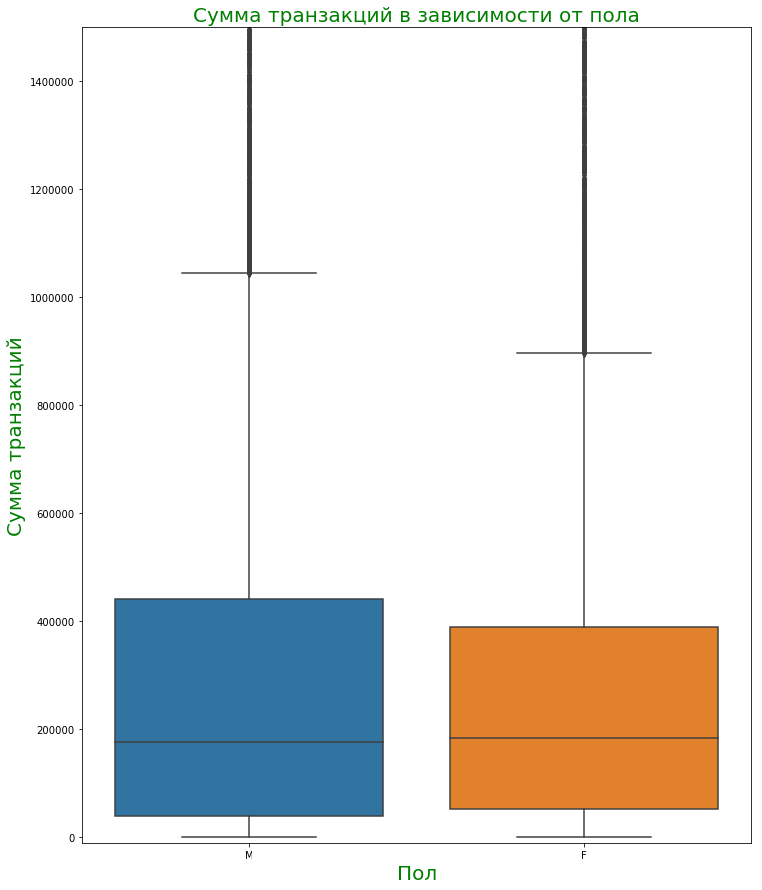

In [41]:
plt.figure(figsize=(12,15))
plt.ylim(-10000, 1500000)
sns.boxplot(data=df[df['dc_trx_sum'] != 0], x='gender', y='dc_trx_sum')
plt.title('Сумма транзакций в зависимости от пола', size=20, color='g')
plt.xlabel('Пол', size=20, color='g')
plt.ylabel('Сумма транзакций', size=20, color='g')
plt.show()

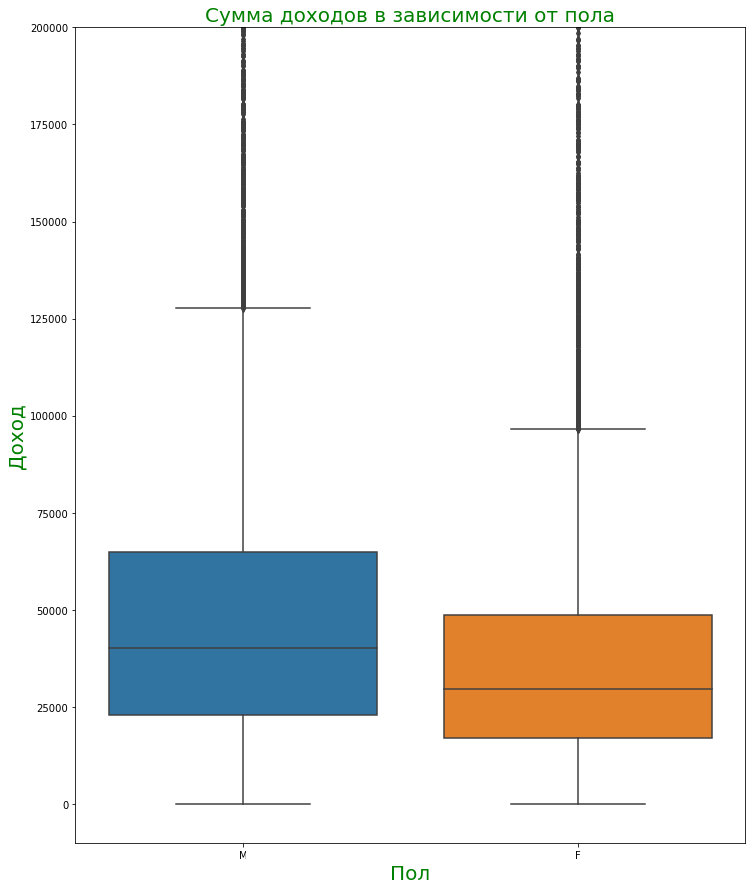

In [42]:
plt.figure(figsize=(12,15))
plt.ylim(-10000, 200000)
sns.boxplot(data=df[df['income'] != 0], x='gender', y='income')
plt.title('Сумма доходов в зависимости от пола', size=20, color='g')
plt.xlabel('Пол', size=20, color='g')
plt.ylabel('Доход', size=20, color='g')
plt.show()

Изучив боксплоты можно сделать вывод,что женщины чаще совершают покупки, а мужчины чаще покупают дорогостоящие товары. Доход мужчин в среднем выше дохода женщин.
